In [1]:
# Import libraries and tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import dataset
train_users = pd.read_csv("/kaggle/input/garanti-bbva-data-camp/train_users.csv")
test_users = pd.read_csv("/kaggle/input/garanti-bbva-data-camp/test_users.csv")

education = pd.read_csv("/kaggle/input/garanti-bbva-data-camp/education.csv")
languages = pd.read_csv("/kaggle/input/garanti-bbva-data-camp/languages.csv")
skills = pd.read_csv("/kaggle/input/garanti-bbva-data-camp/skills.csv")
work_experiences = pd.read_csv("/kaggle/input/garanti-bbva-data-camp/work_experiences.csv")
submission = pd.read_csv("/kaggle/input/garanti-bbva-data-camp/submission.csv")

# https://www.kaggle.com/competitions/garanti-bbva-data-camp/discussion/383774
work_experiences = work_experiences[work_experiences['start_year_month'] < 201901]

In [3]:
train_users

,user_id,industry,location,moved_after_2019
0,1301,Information Technology and Services,"Istanbul, Istanbul, Turkey",1
1,6950,Internet,"Istanbul, Istanbul, Turkey",0
2,4880,Online Media,Turkey,0
3,26046,Telecommunications,"Istanbul, Istanbul, Turkey",0
4,11005,Banking,"Istanbul, Turkey",0
...,...,...,...,...
53014,57247,Information Technology and Services,"Istanbul, Istanbul, Turkey",0
53015,37784,Telecommunications,"Istanbul, Turkey",0
53016,33229,Information Technology and Services,"Ankara, Turkey",0
53017,12165,Internet,"Istanbul, Turkey",1


In [4]:
test_users

,user_id,industry,location
0,17449,Research,Turkey
1,33967,Computer Software,"Istanbul, Istanbul, Turkey"
2,2110,Automotive,Turkey
3,55082,Internet,Turkey
4,37165,Electrical/Electronic Manufacturing,Turkey
...,...,...,...
13250,32847,Computer Software,Turkey
13251,20054,Hospital & Health Care,Turkey
13252,7029,Wireless,"Istanbul, Turkey"
13253,56130,Information Technology and Services,"Ankara, Turkey"


### Data Exploration & Analysis

##### train_users and test_users data

In [5]:
# Concatenate train_users and test_users dfs into main dataframe
main_df = pd.concat([train_users, test_users])
main_df

,user_id,industry,location,moved_after_2019
0,1301,Information Technology and Services,"Istanbul, Istanbul, Turkey",1.0
1,6950,Internet,"Istanbul, Istanbul, Turkey",0.0
2,4880,Online Media,Turkey,0.0
3,26046,Telecommunications,"Istanbul, Istanbul, Turkey",0.0
4,11005,Banking,"Istanbul, Turkey",0.0
...,...,...,...,...
13250,32847,Computer Software,Turkey,NaN
13251,20054,Hospital & Health Care,Turkey,NaN
13252,7029,Wireless,"Istanbul, Turkey",NaN
13253,56130,Information Technology and Services,"Ankara, Turkey",NaN


<AxesSubplot:ylabel='Frequency'>

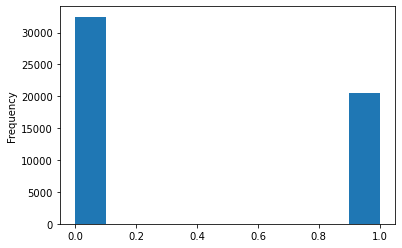

In [6]:
# Dataset label histogram
main_df.moved_after_2019.plot.hist()

In [7]:
# Check number of unique value of user_id column equals to length of df rows
main_df["user_id"].nunique() == main_df.shape[0]

True

In [8]:
# Print shapes of the other dataframes
print("Skills df shape:",skills.shape,"\nEducation df shape:",education.shape,"\nLanguages df shape:",languages.shape,"\nWork experiences df shape:",work_experiences.shape)

Skills df shape: (1398443, 2) 
Education df shape: (142575, 6) 
Languages df shape: (76062, 3) 
Work experiences df shape: (160736, 4)


##### Skills Data

In [9]:
skills.head()

,user_id,skill
0,1,Mühendislik
1,1,Eğitim
2,2,Android
3,2,Java
4,2,3D Studio Max


In [10]:
# How many skills per user_id
skill_counter = skills.pivot_table(columns=["user_id"], aggfunc = 'size')
skill_counter = pd.DataFrame(skill_counter)
skill_counter = skill_counter.rename(columns={0:"skill"})
skill_counter

,skill
user_id,
1,2
2,6
3,3
5,11
6,6
...,...
66269,31
66270,8
66271,47


In [11]:
# First 25 skill
used_skills = skills.skill.value_counts().iloc[:70].index

skills = skills[skills['skill'].isin(used_skills)]
skills['experience'] = True

skills = skills.drop_duplicates(['user_id', 'skill'])
skills = pd.pivot(skills, index='user_id', columns='skill', values='experience')
skills = skills.fillna(0).astype(int)
skills.head()

skill,.NET,AJAX,ASP.NET,ASP.NET MVC,Agile Methodologies,Android,Android Development,Araştırma,AutoCAD,Bootstrap,...,Spring Framework,T-SQL,Visual Studio,Web Development,Web Geliştirme,Web Services,XML,Yazılım Geliştirme,jQuery,İngilizce
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Education Data

In [12]:
education.head()

,user_id,school_name,degree,fields_of_study,start_year_month,end_year_month
0,0,Anadolu Üniversitesi,NaN,NaN,NaN,NaN
1,0,Adıyaman Üniversitesi,NaN,NaN,NaN,NaN
2,0,Fırat Üniversitesi,NaN,NaN,NaN,NaN
3,1,Fırat Üniversitesi,Yüksek Lisans,Yazılım Mühendisliği,NaN,NaN
4,1,Fırat Üniversitesi,Lisans,Yazılım Mühendisliği,NaN,NaN


In [13]:
education.nunique()

user_id             66271
school_name         11113
degree               5888
fields_of_study     11048
start_year_month      223
end_year_month        293
dtype: int64

In [14]:
education.isna().sum()

user_id                  0
school_name              0
degree               35842
fields_of_study      19838
start_year_month    134373
end_year_month      134985
dtype: int64

In [15]:
education = education.drop(['start_year_month', 'end_year_month'], axis=1)
education

,user_id,school_name,degree,fields_of_study
0,0,Anadolu Üniversitesi,NaN,NaN
1,0,Adıyaman Üniversitesi,NaN,NaN
2,0,Fırat Üniversitesi,NaN,NaN
3,1,Fırat Üniversitesi,Yüksek Lisans,Yazılım Mühendisliği
4,1,Fırat Üniversitesi,Lisans,Yazılım Mühendisliği
...,...,...,...,...
142570,66272,Halmstad University,NaN,Computer Science
142571,66272,Bogazici University,NaN,Chemistry
142572,66273,Istanbul Technical University,Bachelor's degree,Electronic and Communication Engineering
142573,66273,Bogazici University,Master's degree,Electrical and Electronics Engineering


In [16]:
# How many graduated school per user_id
education_counter = education.pivot_table(columns=["user_id"], aggfunc = 'size')
education_counter = pd.DataFrame(education_counter)
education_counter = education_counter.rename(columns={0:"education"})
education_counter

,education
user_id,
0,3
1,2
2,2
3,1
4,1
...,...
66269,3
66270,4
66271,3


In [17]:
education_notnull = education[education['school_name'].notnull() & education['degree'].notnull()]

education_conversion = {
    "(?i).*(doktora|doctor|phd|ph.d).*": "phd",
    "(?i).*(yüksek|master|M.Sc|MS|MBA|M.S).*": "master",
    "(?i).*(lisans|licence|bachelor|BS|B.S|B.Sc|engineer|mühendis|mezun|graduate|licentiate).*": "graduate",
}

education_notnull.loc[:, 'degree'] = education_notnull.loc[:, 'degree'].replace(education_conversion, regex=True)
education_notnull = education_notnull[education_notnull['degree'].isin(education_conversion.values())]

education_notnull = education_notnull.drop_duplicates(['user_id', 'degree'])
education_notnull = pd.pivot(education_notnull, index='user_id', columns='degree', values='school_name')
education_notnull.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


degree,graduate,master,phd
user_id,,,
1,Fırat Üniversitesi,Fırat Üniversitesi,NaN
3,Fırat Üniversitesi,NaN,NaN
4,Fırat Üniversitesi,NaN,NaN
5,The State University of Applied Sciences in El...,Firat University,NaN
6,Fırat Üniversitesi,NaN,NaN


##### Languages Data

In [18]:
languages.head()

,user_id,language,proficiency
0,8,İngilizce,full_professional
1,8,Türkçe,native_or_bilingual
2,8,Fransızca,elementary
3,10,ingilizce,NaN
4,11,Turkish,native_or_bilingual


In [19]:
languages.nunique()

user_id        37290
language         513
proficiency        5
dtype: int64

In [20]:
languages.isna().sum()

user_id            0
language           0
proficiency    10661
dtype: int64

In [21]:
language_notnull = languages[languages['language'].notnull() & languages['proficiency'].notnull()]

language_levels = {
    'native_or_bilingual' : 5,
    'full_professional' : 4,
    'professional_working' : 3,
    'limited_working' : 2,
    'elemantary' : 1
}

language_notnull.loc[:, 'proficiency'] = language_notnull.loc[:, 'proficiency'].map(language_levels)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [22]:
# Ignore case sensitivity and convert to proper format
language_conversion = {
    '(?i).*(ingilizce|english|englishch|englisch).*': 'english',
    '(?i).*(almanca|german|deutsch).*': 'german',
    '(?i).*(fransızca|french|français).*': 'french',
    '(?i).*(ispanyolca|spanish|español).*': 'spanish',
    '(?i).*(arapça|arabic).*': 'arabic',
    '(?i).*(rusça|russian).*': 'russian',
    '(?i).*(türkçe|turkish|türkisch).*': 'turkish'
}

language_notnull['language'] = language_notnull['language'].replace(language_conversion, regex=True)
language_notnull = language_notnull[language_notnull['language'].isin(language_conversion.values())]

language_notnull = language_notnull.drop_duplicates(['user_id', 'language'])
language_notnull = pd.pivot(language_notnull, index='user_id', columns='language', values='proficiency')
language_notnull = language_notnull.fillna(0).astype(int)
language_notnull.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":


language,arabic,english,french,german,russian,spanish,turkish
user_id,,,,,,,
8,0,4,0,0,0,0,5
11,0,3,0,0,0,0,5
12,0,3,0,0,0,0,5
13,0,4,0,2,0,0,0
14,0,3,0,0,0,0,5


In [23]:
# How many languages per user_id
language_counter = languages.pivot_table(columns=["user_id"], aggfunc = 'size')
language_counter = pd.DataFrame(language_counter)
language_counter = language_counter.rename(columns={0:"language"})
language_counter

,language
user_id,
8,3
10,1
11,3
12,2
13,2
...,...
66265,1
66269,1
66271,1


##### Work Experiences Data

In [24]:
work_experiences.head()

,user_id,company_id,location,start_year_month
0,53442,2651,"Istanbul, Turkey",201509
1,34558,815,"Istanbul, Turkey",201210
2,63761,26354,NaN,200010
3,10738,89,NaN,201610
4,8711,3113,"Istanbul, Turkey",201801


In [25]:
work_experiences.nunique()

user_id             53002
company_id          18504
location             5649
start_year_month      385
dtype: int64

In [26]:
# Drop "location" column
work_experiences = work_experiences.drop("location",axis=1)

In [27]:
# How many company per user_id
work = work_experiences.pivot_table(columns=["user_id"], aggfunc = 'size')
work = pd.DataFrame(work)
work = work.rename(columns={0:"work"})
work

,work
user_id,
0,2
2,3
5,1
7,4
10,3
...,...
66269,5
66270,2
66271,9


In [28]:
work_new = pd.DataFrame()

work_new['company(1th)'] = work_experiences.groupby('user_id')['company_id'].nth(-1).astype(int)
work_new['company(2th)'] = work_experiences.groupby('user_id')['company_id'].nth(-2).astype(int)
work_new['company(3th)'] = work_experiences.groupby('user_id')['company_id'].nth(-3).astype(int)
work_new['min_exp_time'] = work_experiences.groupby('user_id')['start_year_month'].min()
work_new['max_exp_time'] = work_experiences.groupby('user_id')['start_year_month'].max()

work_new.head()

,company(1th),company(2th),company(3th),min_exp_time,max_exp_time
user_id,,,,,
0,0,0.0,NaN,200509,200509
2,10,7.0,9.0,201612,201806
5,15,NaN,NaN,201706,201706
7,21,21.0,21.0,201607,201812
10,26,26.0,27.0,201308,201805


##### Merging Dataframes

In [29]:
from functools import reduce

data_frames = [skill_counter, education_counter, language_counter, work, language_notnull, skills, work_new, education_notnull, main_df]

df_merged = reduce(lambda left,right: pd.merge(left,right ,on=['user_id'], how='outer'),data_frames) 

In [30]:
df_merged = df_merged.drop("location",axis=1)
df_merged

,user_id,skill,education,language,work,arabic,english,french,german,russian,...,company(1th),company(2th),company(3th),min_exp_time,max_exp_time,graduate,master,phd,industry,moved_after_2019
0,1,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Fırat Üniversitesi,Fırat Üniversitesi,NaN,Computer Software,NaN
1,2,6.0,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,10.0,7.0,9.0,201612.0,201806.0,NaN,NaN,NaN,Electrical/Electronic Manufacturing,NaN
2,3,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Fırat Üniversitesi,NaN,NaN,Computer Software,0.0
3,5,11.0,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,15.0,NaN,NaN,201706.0,201706.0,The State University of Applied Sciences in El...,Firat University,NaN,Computer Software,0.0
4,6,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Fırat Üniversitesi,NaN,NaN,Computer Software,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66269,66241,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,5066.0,NaN,NaN,201601.0,201601.0,Boğaziçi University,NaN,NaN,Pharmaceuticals,0.0
66270,66243,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,1328.0,NaN,NaN,200510.0,200510.0,NaN,Boğaziçi Üniversitesi,NaN,Retail,0.0
66271,66258,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,1864.0,NaN,NaN,201805.0,201805.0,Boğaziçi Üniversitesi,Massachusetts Institute of Technology,NaN,Broadcast Media,1.0
66272,66267,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,1864.0,NaN,NaN,201805.0,201805.0,Boğaziçi Üniversitesi,Massachusetts Institute of Technology,NaN,Broadcast Media,NaN


##### Converting Categorical Features Into Numerical

In [31]:
# Converting "industry" column into numerical
dummies = pd.get_dummies(df_merged.industry)
merged_df = pd.concat([df_merged, dummies],axis = 'columns')
merged_df = merged_df.drop(['industry'], axis='columns')
merged_df

,user_id,skill,education,language,work,arabic,english,french,german,russian,...,Tobacco,Translation and Localization,Transportation/Trucking/Railroad,Utilities,Veterinary,Warehousing,Wholesale,Wine and Spirits,Wireless,Writing and Editing
0,1,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,2,6.0,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,3,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,5,11.0,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,6,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66269,66241,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
66270,66243,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
66271,66258,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
66272,66267,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Encoding education data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
merged_df['graduate'] = le.fit_transform(merged_df['graduate'])
merged_df['phd'] = le.fit_transform(merged_df['phd'])
merged_df['master'] = le.fit_transform(merged_df['master'])

##### Train and Test Data Splitting From Merged Data Frame

In [33]:
train_df = merged_df[merged_df["moved_after_2019"].isna() == False]
train_df

,user_id,skill,education,language,work,arabic,english,french,german,russian,...,Tobacco,Translation and Localization,Transportation/Trucking/Railroad,Utilities,Veterinary,Warehousing,Wholesale,Wine and Spirits,Wireless,Writing and Editing
2,3,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,5,11.0,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,6,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
5,7,7.0,1.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
6,8,5.0,1.0,3.0,NaN,0.0,4.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66267,66235,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
66268,66237,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,0,0
66269,66241,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
66270,66243,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [34]:
test_df = merged_df[merged_df["moved_after_2019"].isna() == True]
test_df

,user_id,skill,education,language,work,arabic,english,french,german,russian,...,Tobacco,Translation and Localization,Transportation/Trucking/Railroad,Utilities,Veterinary,Warehousing,Wholesale,Wine and Spirits,Wireless,Writing and Editing
0,1,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,2,6.0,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9,11,35.0,2.0,3.0,2.0,0.0,3.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
12,14,10.0,2.0,2.0,1.0,0.0,3.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
13,15,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66256,66028,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
66261,66090,NaN,3.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
66263,66151,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
66272,66267,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


##### Filling Missing Values

In [35]:
# Compare shape of train dataframe and number of missing values in train dataframe
train_df.shape ,train_df.isna().sum()

((53019, 232),
 user_id                    0
 skill                   3107
 education                  1
 language               23158
 work                   10543
                        ...  
 Warehousing                0
 Wholesale                  0
 Wine and Spirits           0
 Wireless                   0
 Writing and Editing        0
 Length: 232, dtype: int64)

In [36]:
# Compare shape of test dataframe and number of missing values in test dataframe
test_df.shape, test_df.isna().sum()

((13255, 232),
 user_id                   0
 skill                   765
 education                 2
 language               5826
 work                   2729
                        ... 
 Warehousing               0
 Wholesale                 0
 Wine and Spirits          0
 Wireless                  0
 Writing and Editing       0
 Length: 232, dtype: int64)

In [37]:
# Fill train_df's missing values with mod == most frequent value

for i in train_df:
    train_df[i].fillna(train_df[i].mode()[0], inplace=True)

train_df.isna().sum()

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


user_id                0
skill                  0
education              0
language               0
work                   0
                      ..
Warehousing            0
Wholesale              0
Wine and Spirits       0
Wireless               0
Writing and Editing    0
Length: 232, dtype: int64

In [38]:
# Drop target column before filling missing values to avoid error
test_df.drop('moved_after_2019',axis='columns',inplace=True)

# Fill test_df's missing values with mod == most frequent value
for i in test_df:
    test_df[i].fillna(test_df[i].mode()[0], inplace=True)

test_df.isna().sum()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


user_id                0
skill                  0
education              0
language               0
work                   0
                      ..
Warehousing            0
Wholesale              0
Wine and Spirits       0
Wireless               0
Writing and Editing    0
Length: 231, dtype: int64

##### Modelling

In [39]:
X = train_df.drop(["moved_after_2019"],axis=1)
y = train_df["moved_after_2019"]

In [40]:
# Train-test splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier

# Put models into dictionary
models = {'RandomForestClassifier': RandomForestClassifier(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'ExtraTreesClassifier':ExtraTreesClassifier(),
          'VotingClassifier':VotingClassifier(estimators=[('rf',RandomForestClassifier()),
                                                          ('dt',DecisionTreeClassifier()),
                                                          ('gb',GradientBoostingClassifier()),
                                                         ('extra',ExtraTreesClassifier()),
                                                         ('XGB',xgb.XGBClassifier())], voting='soft')}

# Create a function to fit and score models
def fit_and_score(models, X_train, y_train, y_test):
    """
    Fits and evaluate given ML models.
    models: a dict of different Sklearn ML models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dict to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train,y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [42]:
model_scores = fit_and_score(models=models, X_train=X_train, y_train=y_train, y_test=y_test)

<AxesSubplot:>

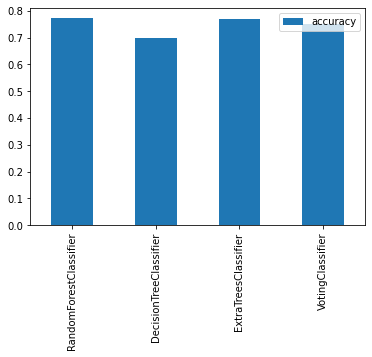

In [43]:
# Model Comparison
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

In [44]:
model_scores

{'RandomForestClassifier': 0.7727272727272727,
 'DecisionTreeClassifier': 0.7001131648434553,
 'ExtraTreesClassifier': 0.7700867597133157,
 'VotingClassifier': 0.7517917766880422}

##### Hyperparameter Tuning for Random Forest Classifier

In [45]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Setup random seed
np.random.seed(42)

# Create a hyperparemeter grid for RandomForestClassifier
rf_classifier_grid = {"n_estimators":np.arange(50,1000,50),
                      "max_depth":[None, 3, 5, 10],
                      "min_samples_split":np.arange(2,20,2),
                      "min_samples_leaf":np.arange(1,20,2),
                      "criterion":["gini","entropy","log_loss"]}

# Setup random hyperparameter search for RandomForestClassifier

'''
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_classifier_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True,
                           random_state=42)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)
'''

# Find the best hyperparameters
#rs_rf.best_params_

# Evaluate the randomized search RFClassifier model
#rs_rf.score(X_test,y_test)

'\nrs_rf = RandomizedSearchCV(RandomForestClassifier(),\n                           param_distributions=rf_classifier_grid,\n                           cv=5,\n                           n_iter=20,\n                           verbose=True,\n                           random_state=42)\n\n# Fit random hyperparameter search model for RandomForestClassifier()\nrs_rf.fit(X_train, y_train)\n'

##### Hyperparameter Tuning For Voting Classifier

In [46]:
'''
# Defining Voting Classifier hyperparam values
vc_params = {'voting': ['soft','hard'],
             'weights':[(1,1,1),(2,1,1),(1,2,1),(1,1,2),
                        (2,2,1),(2,1,2),(1,2,2)]}

grid = GridSearchCV(model, vc_params)
grid.fit(X_train,y_train)
'''

"\n# Defining Voting Classifier hyperparam values\nvc_params = {'voting': ['soft','hard'],\n             'weights':[(1,1,1),(2,1,1),(1,2,1),(1,1,2),\n                        (2,2,1),(2,1,2),(1,2,2)]}\n\ngrid = GridSearchCV(model, vc_params)\ngrid.fit(X_train,y_train)\n"

In [47]:
#print(f'The best params is : {grid.best_params_}')

###### Best Voting Classifier params is : 'voting': 'soft', 'weights':(2,2,1)

##### Random Forest Classifier // Voting Classifier

In [48]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Fitting Random Forest Classifier with best params
'''
model = RandomForestClassifier( n_estimators = 510,
                                min_samples_split = 10,
                                min_samples_leaf = 1,
                                max_depth = None)
'''

# Fitting Voting Classifier model with the best params
model = VotingClassifier(estimators=[('rf',RandomForestClassifier()),
                                     ('extra',ExtraTreesClassifier()),
                                     ('XGB',xgb.XGBClassifier())],
                                      voting='soft', 
                                      weights=(2, 2, 1))

# Cross validation
cv = StratifiedKFold(shuffle=True, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

print(f'Scores mean: {np.mean(scores):.4f}')
print(f'Scores std: {np.std(scores):.4f}')

Scores mean: 0.7647
Scores std: 0.0024


In [49]:
model.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('extra', ExtraTreesClassifier()),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type...e,
                                            interaction_constraints=None,
                                            learning_rate=None, max_b

In [50]:
model.score(X_test, y_test)

0.7729158807996982

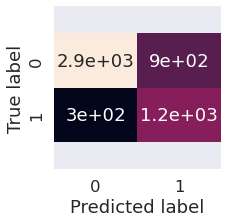

In [51]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.set(font_scale=1.5)

y_preds = model.predict(X_test)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_preds, y_test),
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       0.76      0.91      0.83      3217
         1.0       0.80      0.57      0.66      2085

    accuracy                           0.77      5302
   macro avg       0.78      0.74      0.75      5302
weighted avg       0.78      0.77      0.76      5302



##### Creating submission file

In [53]:
# Reindex test_df based on submission file's user_id order
test_df = test_df.set_index('user_id')
test_df = test_df.reindex(index = submission['user_id'])
test_df = test_df.reset_index()
test_df

,user_id,skill,education,language,work,arabic,english,french,german,russian,...,Tobacco,Translation and Localization,Transportation/Trucking/Railroad,Utilities,Veterinary,Warehousing,Wholesale,Wine and Spirits,Wireless,Writing and Editing
0,17449,34.0,6.0,2.0,3.0,0.0,3.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,33967,31.0,4.0,4.0,2.0,0.0,5.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2110,13.0,1.0,3.0,1.0,0.0,2.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,55082,37.0,2.0,2.0,2.0,0.0,3.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,37165,4.0,2.0,2.0,1.0,0.0,4.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13250,32847,6.0,1.0,2.0,1.0,0.0,3.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
13251,20054,4.0,3.0,2.0,3.0,0.0,3.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
13252,7029,5.0,3.0,3.0,2.0,0.0,3.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
13253,56130,16.0,1.0,2.0,3.0,0.0,3.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
submission['moved_after_2019'] = model.predict(test_df)

In [55]:
submission['moved_after_2019'] = submission['moved_after_2019'].astype(int)

In [56]:
submission.to_csv('/kaggle/working/submission.csv',index=False)